# Modelo Aprendizaje no Supervisado Algoritmo K-means

In [75]:
#Cargar las librerias necesarias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones
import plotly.graph_objs as go # Creación de gráficos en tres dimensiones
import plotly.express as px # Creación de gráficos en tres dimensiones
from sklearn.preprocessing import StandardScaler
# librerías de para implementar modelo Kmeans
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# librerías de para evaluar el modelo
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

#Librería para evitar la advertencia de que el modelo de KMeans tiene una pérdida de memoria en Windows 
import warnings
warnings.filterwarnings('ignore')

In [77]:
#Cargamos el dataset y mostramos las 5 primeras filas
data = pd.read_csv("Mall_Customers.csv")
data.head(2)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


In [79]:
# Verificamos la dimensión del dataset
data.shape

(200, 5)

In [81]:
# Descripción de los datos
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [83]:
# Verificamos datos nulos
data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

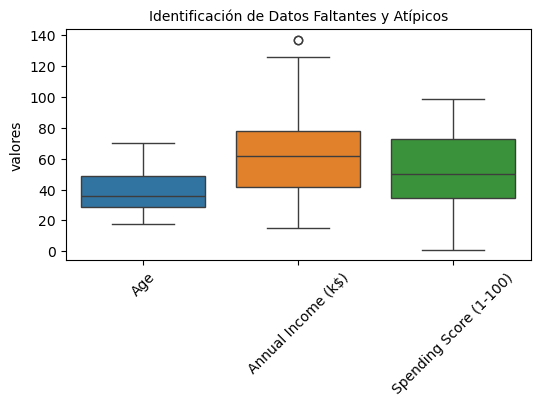

In [85]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(data=data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.xticks(rotation=45)
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10)
plt.ylabel('valores')
plt.show()

In [87]:
#Conteo de Datos Atípicos
nivel_minimo=0
nivel_maximo=100
Total_Atipicos=((data['Spending Score (1-100)']<nivel_minimo)|(data['Spending Score (1-100)']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [89]:
#Revisión del tipo de datos y datos faltantes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [91]:
# Filtrar columnas del modelo 
data = data[["Annual Income (k$)","Spending Score (1-100)"]]

In [93]:
# Revisión de los datos de las variables objetivo
data.head(2)

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81


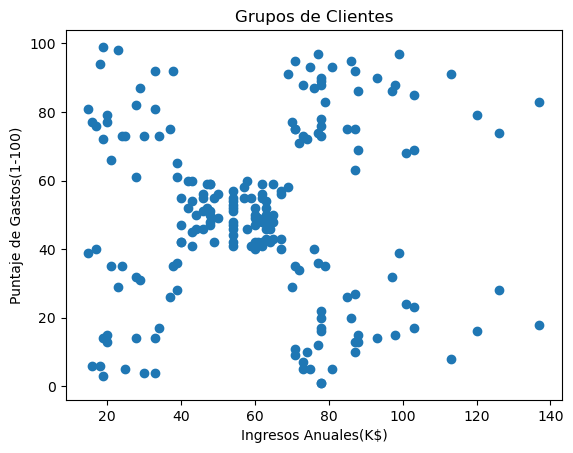

In [95]:
# Grafica antes del agrupamiento

plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'])
plt.xlabel('Ingresos Anuales(K$)')
plt.ylabel('Puntaje de Gastos(1-100)')
plt.title('Grupos de Clientes')
plt.show()

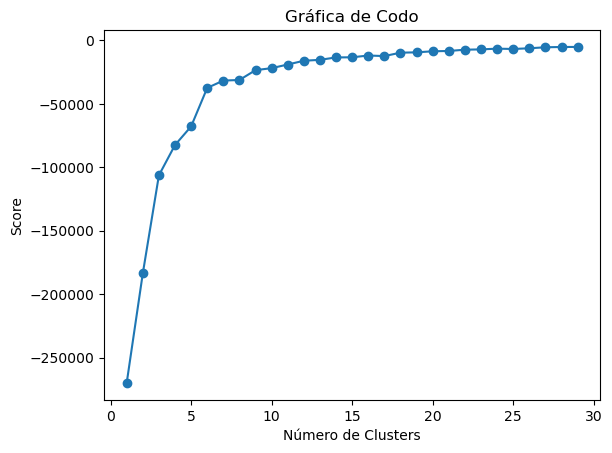

In [97]:
#Se realiza gráfica de codo para identificar valor de K
Nc = range(1, 30)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(data).score(data) for i in range(len(kmeans))]
score
plt.plot(Nc,score, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.title('Gráfica de Codo')
plt.show()

In [99]:
# Generación del modelo de Agrupamiento del modelo con K=5  
Modelo = KMeans(n_clusters=5, random_state=0)
Modelo.fit(data)

KMeans(n_clusters=5, random_state=0)

In [101]:
#Se agrega la columna Grupo a la BD para identificar el numero de grupo del agrupamiento
Modelo.labels_
data["Grupo"] = Modelo.labels_ 
print (data)

     Annual Income (k$)  Spending Score (1-100)  Grupo
0                    15                      39      3
1                    15                      81      4
2                    16                       6      3
3                    16                      77      4
4                    17                      40      3
..                  ...                     ...    ...
195                 120                      79      1
196                 126                      28      2
197                 126                      74      1
198                 137                      18      2
199                 137                      83      1

[200 rows x 3 columns]


In [103]:
# Desempeño del modelo con el Coeficiente de Silhouette el Índice de Calinski-Harabasz y el índice de Davies Bouldin Score

# Preparación de la metrica de la columna Grupo
Observaciones = len(data)
X = data.drop('Grupo', axis=1)
clusters = data['Grupo']

# Se calculan las métricas
sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

# Se crea una tabla para mostrar los valores de las métricas
table_data = [
    ["Numero de Observaciones", Observaciones],
    ["Coeficiente Silhouette", sil_score],
    ["Indice Calinski Harabasz", calinski_score],
    ["Indice Davies Bouldin", davies_score]
]

# Imprime la tabla
from tabulate import tabulate
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt='pretty'))

+--------------------------+--------------------+
|          Metric          |       Value        |
+--------------------------+--------------------+
| Numero de Observaciones  |        200         |
|  Coeficiente Silhouette  | 0.553931997444648  |
| Indice Calinski Harabasz | 247.35899338037282 |
|  Indice Davies Bouldin   | 0.5725628995597086 |
+--------------------------+--------------------+


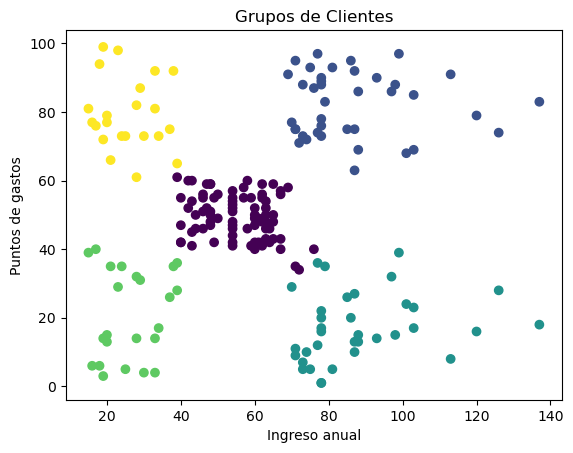

In [105]:
# Gráfica de dispersión después del agrupamiento
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Grupo'], cmap='viridis')
plt.xlabel('Ingreso anual')
plt.ylabel('Puntos de gastos')
plt.title('Grupos de Clientes')
plt.show()

## Interpretación de resultados

* El coeficiente de silueta de 0.55, permite evidenciar que en los límites entre grupos un cliente puede inclinarse a uno u otro, pero en general los clientes dentro de cada grupo están bien definidos y comparten las mismas características.

* El índice de Calinski-Harabasz de 247, es un resultado alto y permite evidenciar que los grupos están bien definidos y que su separación es evidente, en general los clientes de un grupo no se parecen a los de otro.

* El índice de Davies-Bouldin de 0.57, permite evidenciar que al ser un resultado equilibrado los datos están bien distribuidos y no se mezclan entre si, dejando una distancia clara entre grupos de mercado.